In [1]:
from rake_nltk import Rake 
import nltk
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('IMDBfeatures.csv')
df.index = list(range(1,251))

In [3]:
df.head()

,Movie Name,Director,Cast,Plot,Genre
1,The Shawshank Redemption,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,Drama
2,The Godfather,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,Crime
3,The Godfather: Part II,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,Crime
4,The Dark Knight,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,Action
5,12 Angry Men,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,Drama


In [4]:
df.loc[(df.Genre == 'Drama')]

,Movie Name,Director,Cast,Plot,Genre
1,The Shawshank Redemption,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,Drama
5,12 Angry Men,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,Drama
10,Fight Club,David Fincher,"Edward Norton, Brad Pitt, Meat Loaf, Zach Grenier",An insomniac office worker and a devil-may-car...,Drama
12,Forrest Gump,Robert Zemeckis,"Tom Hanks, Rebecca Williams, Sally Field, Mich...","The presidencies of Kennedy and Johnson, the e...",Drama
18,One Flew Over the Cuckoo's Nest,Milos Forman,"Michael Berryman, Peter Brocco, Dean R. Brooks...",A criminal pleads insanity and is admitted to ...,Drama
25,It's a Wonderful Life,Frank Capra,"James Stewart, Donna Reed, Lionel Barrymore, T...",An angel is sent from Heaven to help a despera...,Drama
27,Saving Private Ryan,Steven Spielberg,"Tom Hanks, Tom Sizemore, Edward Burns, Barry P...","Following the Normandy Landings, a group of U....",Drama
32,Harakiri,Masaki Kobayashi,"Tatsuya Nakadai, Akira Ishihama, Shima Iwashit...",When a ronin requesting seppuku at a feudal lo...,Drama
35,American History X,Tony Kaye,"Edward Norton, Edward Furlong, Beverly D'Angel...",A former neo-nazi skinhead tries to prevent hi...,Drama
46,Whiplash,Damien Chazelle,"Miles Teller, J.K. Simmons, Paul Reiser, Melis...",A promising young drummer enrolls at a cut-thr...,Drama


In [5]:
df['Genre'].value_counts()

Drama        74
Action       36
Crime        35
Comedy       26
Adventure    24
Biography    22
Animation    22
Mystery       4
Horror        3
Western       3
Film-Noir     1
Name: Genre, dtype: int64

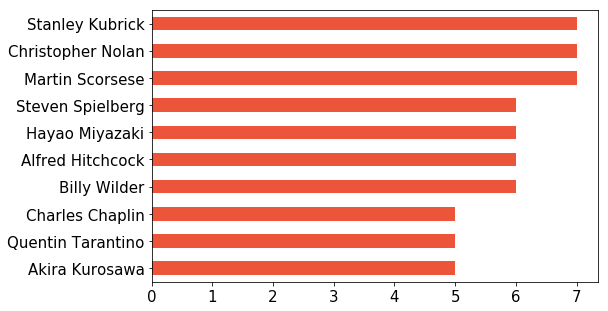

In [10]:
df['Director'].value_counts()[0:10].plot('barh', figsize=[8,5], fontsize=15, color='#ED553B').invert_yaxis()

#### Data Preprocessing

In [11]:
import string
df['Plot'] = df['Plot'].str.replace('[{}]'.format(string.punctuation), '')

In [12]:
df['Key_words'] = ''  
r = Rake()   # use Rake to discard stop words 

for index, row in df.iterrows():
    r.extract_keywords_from_text(row['Plot'])   # to extract key words from Plot, default in lower case
    key_words_dict_scores = r.get_word_degrees()    # to get dictionary with key words and their scores
    row['Key_words'] = list(key_words_dict_scores.keys())   # to assign list of key words to new column

df.head()

,Movie Name,Director,Cast,Plot,Genre,Key_words
1,The Shawshank Redemption,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,Drama,"[years, finding, solace, acts, common, decency..."
2,The Godfather,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,Crime,"[organized, crime, dynasty, transfers, control..."
3,The Godfather: Part II,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,Crime,"[family, crime, syndicate, vito, corleone, gri..."
4,The Dark Knight,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,Action,"[chaos, people, gotham, batman, must, accept, ..."
5,12 Angry Men,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,Drama,"[colleagues, reconsider, justice, jury, holdou..."


In [13]:
df['Plot'][249]

'A baby boy discovered in 1900 on an ocean liner grows into a musical prodigy never setting foot on land'

In [14]:
# to see last dictionary extracted from Plot
key_words_dict_scores

defaultdict(<function rake_nltk.rake.Rake._build_word_co_occurance_graph.<locals>.<lambda>()>,
            {'magic': 4,
             'crystal': 4,
             'must': 4,
             'race': 4,
             'legendary': 3,
             'floating': 3,
             'castle': 3,
             'young': 2,
             'boy': 2,
             'girl': 1,
             'foreign': 2,
             'agents': 2,
             'pirates': 1,
             'search': 1})

In [16]:
# to see last item in Key_words
df['Key_words'][249]

['1900',
 'ocean',
 'liner',
 'grows',
 'musical',
 'prodigy',
 'never',
 'setting',
 'foot',
 'land',
 'baby',
 'boy',
 'discovered']

In [17]:
# to extract all genre into a list, only the first three actors into a list, and all directors into a list
df['Genre'] = df['Genre'].map(lambda x: x.split(','))
df['Cast'] = df['Cast'].map(lambda x: x.split(',')[:3])
df['Director'] = df['Director'].map(lambda x: x.split(','))

# create unique identity names by merging first & last name into one word, convert to lowercase 
for index, row in df.iterrows():
    row['Genre'] = [x.lower().replace(' ','') for x in row['Genre']]
    row['Cast'] = [x.lower().replace(' ','') for x in row['Cast']]
    row['Director'] = [x.lower().replace(' ','') for x in row['Director']]
df

,Movie Name,Director,Cast,Plot,Genre,Key_words
1,The Shawshank Redemption,[frankdarabont],"[timrobbins, morganfreeman, bobgunton]",Two imprisoned men bond over a number of years...,[drama],"[years, finding, solace, acts, common, decency..."
2,The Godfather,[francisfordcoppola],"[marlonbrando, alpacino, jamescaan]",The aging patriarch of an organized crime dyna...,[crime],"[organized, crime, dynasty, transfers, control..."
3,The Godfather: Part II,[francisfordcoppola],"[alpacino, robertduvall, dianekeaton]",The early life and career of Vito Corleone in ...,[crime],"[family, crime, syndicate, vito, corleone, gri..."
4,The Dark Knight,[christophernolan],"[christianbale, heathledger, aaroneckhart]",When the menace known as the Joker wreaks havo...,[action],"[chaos, people, gotham, batman, must, accept, ..."
5,12 Angry Men,[sidneylumet],"[martinbalsam, johnfiedler, leej.cobb]",A jury holdout attempts to prevent a miscarria...,[drama],"[colleagues, reconsider, justice, jury, holdou..."
6,Schindler's List,[stevenspielberg],"[liamneeson, benkingsley, ralphfiennes]",In Germanoccupied Poland during World War II i...,[biography],"[nazis, germanoccupied, poland, jewish, workfo..."
7,The Lord of the Rings: The Return of the King,[peterjackson],"[noelappleby, aliastin, seanastin]",Gandalf and Aragorn lead the World of Men agai...,[adventure],"[men, frodo, gandalf, approach, mount, doom, s..."
8,Pulp Fiction,[quentintarantino],"[timroth, amandaplummer, lauralovelace]",The lives of two mob hitmen a boxer a gangster...,[crime],"[two, mob, hitmen, gangster, wife, pair, lives..."
9,"The Good, the Bad and the Ugly",[sergioleone],"[eliwallach, clinteastwood, leevancleef]",A bounty hunting scam joins two men in an unea...,[western],"[fortune, gold, buried, bounty, hunting, scam,..."
10,Fight Club,[davidfincher],"[edwardnorton, bradpitt, meatloaf]",An insomniac office worker and a devilmaycare ...,[drama],"[devilmaycare, soapmaker, form, evolves, insom..."


#### Combining column attributes to Bag of words

In [20]:
df['Bag_of_words'] = ''
columns = ['Genre', 'Director', 'Cast', 'Key_words']

for index, row in df.iterrows():
    words = ''
    for col in columns:
        words += ' '.join(row[col]) + ' '
    row['Bag_of_words'] = words
    
df = df[['Movie Name','Bag_of_words']]
df

,Movie Name,Bag_of_words
1,The Shawshank Redemption,drama frankdarabont timrobbins morganfreeman b...
2,The Godfather,crime francisfordcoppola marlonbrando alpacino...
3,The Godfather: Part II,crime francisfordcoppola alpacino robertduvall...
4,The Dark Knight,action christophernolan christianbale heathled...
5,12 Angry Men,drama sidneylumet martinbalsam johnfiedler lee...
6,Schindler's List,biography stevenspielberg liamneeson benkingsl...
7,The Lord of the Rings: The Return of the King,adventure peterjackson noelappleby aliastin se...
8,Pulp Fiction,crime quentintarantino timroth amandaplummer l...
9,"The Good, the Bad and the Ugly",western sergioleone eliwallach clinteastwood l...
10,Fight Club,drama davidfincher edwardnorton bradpitt meatl...


In [22]:
df['Bag_of_words'][1]

'drama frankdarabont timrobbins morganfreeman bobgunton years finding solace acts common decency eventual redemption two imprisoned men bond number '

#### Vector representation for Bag of words and the similarity matrix

In [23]:
# to generate the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(df['Bag_of_words'])
count_matrix

<250x3057 sparse matrix of type '<class 'numpy.int64'>'
	with 4884 stored elements in Compressed Sparse Row format>

In [24]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.         0.         ... 0.06085806 0.05555556 0.        ]
 [0.         1.         0.32998316 ... 0.         0.         0.        ]
 [0.         0.32998316 1.         ... 0.         0.         0.        ]
 ...
 [0.06085806 0.         0.         ... 1.         0.06085806 0.        ]
 [0.05555556 0.         0.         ... 0.06085806 1.         0.05407381]
 [0.         0.         0.         ... 0.         0.05407381 1.        ]]


In [26]:
# to create a Series for movie titles which can be used as indices (each index is mapped to a movie title)
indices = pd.Series(df['Movie Name'])
indices[:5]

1    The Shawshank Redemption
2               The Godfather
3      The Godfather: Part II
4             The Dark Knight
5                12 Angry Men
Name: Movie Name, dtype: object

## Recommender Model

In [31]:
def recommend(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[indices == title].index[0]   # to get the index of the movie title matching the input movie
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)   # similarity scores in descending order
    top_10_indices = list(score_series.iloc[1:11].index)   # to get the indices of top 10 most similar movies
    
    
    for i in top_10_indices:   # to append the titles of top 10 similar movies to the recommended_movies list
        recommended_movies.append(list(df['Movie Name'])[i])
        
    return recommended_movies

In [32]:
recommend('Joker')

['Persona',
 "Hachi: A Dog's Tale",
 'The Sixth Sense',
 'Eternal Sunshine of the Spotless Mind',
 'Babam ve Oglum',
 'Ikiru',
 'Bicycle Thieves',
 'Requiem for a Dream',
 'Tokyo Story',
 'Capharna√ºm']

In [39]:
recommend('Blade Runner')

['The Godfather',
 '12 Angry Men',
 'City of God',
 'Drishyam',
 'The 400 Blows',
 'Andhadhun',
 'Fargo',
 'The Godfather: Part II',
 'Joker',
 'M']

The model has recommended similar movies. :)